## Merge report files

In [31]:
import pickle
import numpy as np
results = []
r = []

Id = 59

names = ["0_20","20_40","40_60","60_80"]
for n in names:
    with open("_pickles/results_avg_%s.p"%n,'rb') as f:
        results += pickle.load(f)
    with open("_pickles/results_%s.p"%n,'rb') as f:
        r += pickle.load(f)
with open("_pickles/results_ens_z30_%s.p"%Id,'wb') as f:
    pickle.dump( r, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("_pickles/results_z30_%s.p"%Id,'wb') as f:
    pickle.dump( results, f, protocol=pickle.HIGHEST_PROTOCOL)

Select the Id and weights folder of the experiment

In [45]:
import pickle
import numpy as np
'''
_3 for run3 with part of TRAIN as superval
_4 for run4 with part of TRAIN as superval --> weird
_5 for run3 with part of TEST as superval
_6 for run3 with part of TEST as superval (speeded up but no sigma calculation)
_7 for run3 with part of TRAIN as superval (speeded up but no sigma calculation)

_8 for run5 (80%) with SUPERVAL separated by date
_9 for run6 (90%) with SUPERVAL separated by date

_10 for run7 (80%) with SUPERVAL shuffled day groups (fail)
_11 for run8 (90%) with SUPERVAL shuffled day groups (fail)

_12 for run9 (80%) with SUPERVAL shuffled day groups (fail)
_13 for run10 (90%) with SUPERVAL shuffled day groups (fail)

_15 for run12 Merged z_30
_16 for run13 Merged z_50
_17 for run14 Merged z_70

_18 for run15 Merged a_z_30
_19 for run16 Merged a_z_50
_20 for run17 Merged a_z_70

_21 for run18 Merged a_30
_22 for run19 Merged a_50
_23 for run20 Merged a_70

_24 for run21 Sequential z_30
_25 for run22 End2End z_30

_26 for run23 E2E z_30
_27 for run24 E2E z_50
_28 for run25 E2E z_70

_29 for run26 E2E a_z_30
_30 for run27 E2E a_z_50
_31 for run28 E2E a_z_70

_32 for run29 E2E a_30
_33 for run30 E2E a_50
_34 for run31 E2E a_70

_35 for run32 variable architecture Merged z
_36 for run33 variable architecture End2End z
_37 for run34 variable architecture End2End a_z
_38 for run35 variable architecture Merged a_z
'''

Id = 36
#weightsDir = "weightsCV_run56"
weightsDir = "../../../_backupscqc/weightsCV_run33"


with open("pickles/results_z30_%s.p"%Id,'rb') as f:
    results = pickle.load(f)
with open("pickles/results_ens_z30_%s.p"%Id,'rb') as f:
    r = pickle.load(f)

Build list of parameters

In [46]:
import glob
with open("%s/CVhyperasSearchParameters_z_30.p"%weightsDir,'rb') as f:
    params, loss, _ = pickle.load(f)

# Remove parameters that led straight away to NaN loss (so no saved models)
print(loss)
j=0
mask = []
for i in range(len(params)):
    for n in range(3):
        if n==0:
            mask.append(True)
        j+=1
#print(mask)
params = [params[i] for i,m in enumerate(mask) if m]

filenames = []
unique = []
params_dic = {}

i=0
temp=[]
for file in glob.glob("%s/test_*.hdf5"%(weightsDir)):
    name = file[len(weightsDir)+6:-7]
    if name not in unique:
        unique.append(name)
    if name[:-3] not in params_dic:
        #print(i, len(params))
        if i<len(params):
            params_dic[name[:-3]] = params[i]
            #print(i,name[:-3], params[i])
        else:
            print("Error not enough params")
        i+=1
for u in unique:
    filenames.append([f[len(weightsDir)+1:-5] for f in glob.glob("%s/test_*.hdf5"%(weightsDir)) if u in f])
    #print(filenames[-1])

print(len(filenames))


[0.68082076073679598, 0.68386928452342866, 0.67446770246922949, 0.6748996924739894, 0.68117803184487635, 0.66954702144605482, 0.67905816256563412, 0.68162972511696462, 0.67485291014325544, 0.69105520801208964, 0.68846658253141635, 0.68676301806243423, 0.67714809103905593, 0.68049355191452832, 0.67394093500586305, 0.67508740983650839, 0.67895230975813126, 0.6704640071908875, 0.67993224893903048, 0.68547876104028205, 0.67186226976713548, 0.6767979234284176, 0.68185632935348295, 0.67197292302173717, 0.68052318144231505, 0.68161074352676576, 0.67944085903113483, 0.68238868870996006, 0.68414881644153647, 0.6749677237381696, 0.69096039323350789, 0.68607053365789827, 0.68339522917506867, 0.68054196239734943, 0.68223289951384225, 0.67840844676709033, 0.67947815743065754, 0.6802404006064614, 0.67070184324212057, 0.68083540225985206, 0.68468464006287932, 0.679605613885923, 0.69260600241126347, 0.68354466500506406, 0.68041915603787018, 0.68038380475152915, 0.68720555661627569, 0.67495724363484022

160


### Produce Graph for version 1 of records (most of them)
Comment or uncomment ''' whether you want to have parameters such as dropout as x-axis instead of modelId

argmax =  3.0
best test acc: 51.590613242 
selected test acc: 52.212949589 | 0.0 
selected ens test acc: 52.2414807682 | 0.0 
selected ens unanimity test acc: 53.1568537958 | 0.0


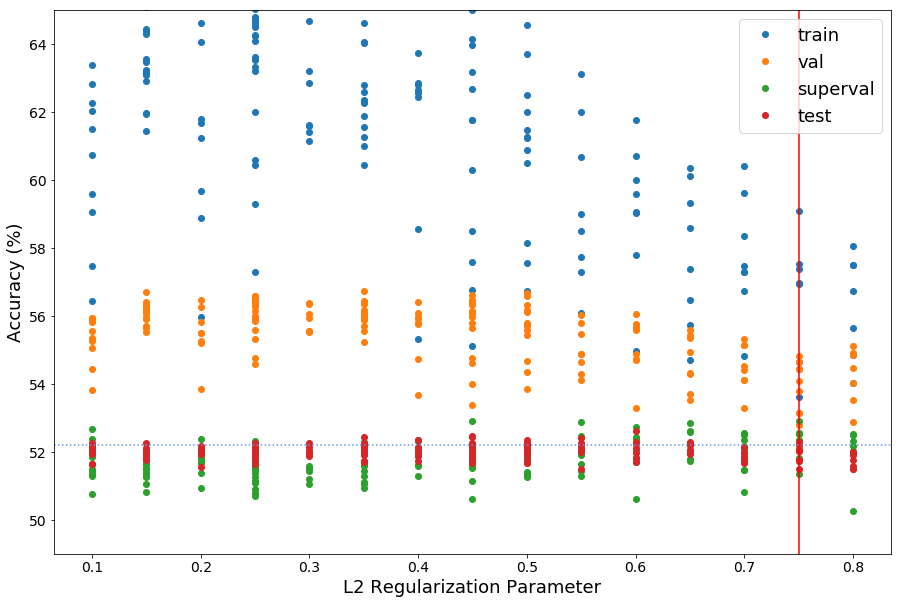

In [49]:
nparray = np.zeros((len(results),20))
for i,res in enumerate(results):
    param = params_dic[filenames[i][0][5:-5]]
    nparray[i,:]= i,res[0][0],res[0][1],res[1][0],res[1][1],res[2][0],res[2][1],r[i][0][0],r[i][0][1],r[i][1][0],r[i][1][1],r[i][2][0],r[i][2][1],res[3][0],res[3][1],r[i][3][0],r[i][3][1],param["d"],param["a1"],param["a2"]
    #nparray[i,:]= i,res[0][0],res[0][1],res[1][0],res[1][1],res[2][0],res[2][1],r[i][0][0],r[i][0][1],r[i][1][0],r[i][1][1],r[i][2][0],r[i][2][1],res[3][0],res[3][1],r[i][3][0],r[i][3][1],param["l2"],param["d"],1#,param["a1"],param["a2"]


import matplotlib.pyplot as plt
%matplotlib inline

# order by: 
#   3 for val
#   5 for test
#   7 for ens test
#   9 for ens test unanimity
#   13 for superval
#   17 for dropout
idx = 17
nparray = nparray[nparray[:,idx].argsort()[::-1]]
nparray = nparray[nparray[:,18]>0.55]
#nparray = nparray[(nparray[:,13]+nparray[:,15]).argsort()[::-1]]

argmidx1=15
argmidx2=13
argm = np.argmax(nparray[0:200,argmidx1]+nparray[0:200,argmidx2])
plt.figure(figsize=(15,10))


s=0
k=1
'''
plt.plot(nparray[s:200:k,1],'-o', label='train')
plt.plot(nparray[s:200:k,3],'-o',label='val')
plt.plot(nparray[s:200:k,5],'-o',label='test')
plt.plot((nparray[s:200:k,13]+nparray[s:200:k,15])/2,'-o',label='superval')
#plt.plot(nparray[s:200:k,15],'-o',label='superval2')
#plt.plot(nparray[0:200,7],label='test_ens_soft')
#plt.plot(nparray[0:200,9],label='test_ens_una')
#plt.plot(nparray[0:200,11],label='test_ens_hard')
plt.axvline(x=int(argm/k),linestyle=':', color='cornflowerblue')

'''
plt.plot(nparray[s:200:k,idx],nparray[s:200:k,1],'o', label='train')
plt.plot(nparray[s:200:k,idx],nparray[s:200:k,3],'o',label='val')
plt.plot(nparray[s:200:k,idx],(nparray[s:200:k,13]+nparray[s:200:k,15])/2,'o',label='superval')
plt.plot(nparray[s:200:k,idx],nparray[s:200:k,5],'o',label='test')
#plt.plot(nparray[0:200,idx],nparray[0:200,15],'o',label='superval2')
#plt.plot(nparray[0:200,idx],nparray[0:200,7],'o',label='test_ens_soft')
#plt.plot(nparray[0:200,idx],nparray[0:200,9],'o',label='test_ens_una')
#plt.plot(nparray[0:200,idx],nparray[0:200,11],'o',label='test_ens_hard')
#plt.plot(nparray[0:200,idx],nparray[0:200,13],'o',label='superval')
plt.axvline(x=nparray[argm,idx],color='r')
#'''

plt.axhline(y=nparray[argm,5],linestyle=':', color='cornflowerblue')
#plt.axhline(y=(nparray[argm,argmidx1]+nparray[argm,argmidx2])/2,color='y')

axes = plt.gca()
axes.set_ylim([49,65])
#plt.xlabel('Model id', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('L2 Regularization Parameter', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=18)

plt.legend(loc=1,prop={'size': 18})
print("argmax = ",nparray[argm,0])
print("best test acc: %s \nselected test acc: %s | %s \nselected ens test acc: %s | %s \nselected ens unanimity test acc: %s | %s"%(nparray[0,5],nparray[argm,5],nparray[argm,6],nparray[argm,7],nparray[argm,8],nparray[argm,9],nparray[argm,10]))

plt.savefig('foo.png', bbox_inches='tight')

### Produce Graph for version 2 of records (ones actually produced)
Comment or uncomment ''' whether you want to have parameters such as dropout as x-axis instead of modelId

In [47]:
nparray = np.zeros((len(results),12))
for i,res in enumerate(results):
    param = params_dic[filenames[i][0][5:-5]]
    nparray[i,:]= i, res[0],res[1],res[2],res[3], r[i][0],r[i][1],r[i][2],r[i][3], param["d"],1,1#,param["a1"],param["a2"]


import matplotlib.pyplot as plt
%matplotlib inline

# order by: 
#   2 for val
#   3 for test
#   5 for ens test
#   6 for ens test unanimity
#   4 for superval
#   9 for dropout
idx = 3
nparray = nparray[nparray[:,idx].argsort()[::-1]]

argmidx1=4
argmidx2=8
argm = np.argmax(nparray[0:200,argmidx1]+nparray[0:200,argmidx2])
plt.figure(figsize=(15,10))


#'''
plt.plot(nparray[0:200,1],'-o', label='train')
plt.plot(nparray[0:200,2],'-o',label='val')
plt.plot(nparray[0:200,3],'-o',label='test')
plt.plot(nparray[0:200,4],'-o',label='superval')
plt.plot(nparray[0:200,8],'-o',label='superval2')
#plt.plot(nparray[0:200,5],label='test_ens_soft')
#plt.plot(nparray[0:200,6],label='test_ens_una')
#plt.plot(nparray[0:200,7],label='test_ens_hard')
plt.axvline(x=argm,color='r')

'''
plt.plot(nparray[0:200,idx],nparray[0:200,1],'o', label='train')
plt.plot(nparray[0:200,idx],nparray[0:200,3],'o',label='val')
plt.plot(nparray[0:200,idx],nparray[0:200,5],'o',label='test')
plt.plot(nparray[0:200,idx],nparray[0:200,15],'o',label='superval2')
#plt.plot(nparray[0:200,idx],nparray[0:200,7],'o',label='test_ens_soft')
#plt.plot(nparray[0:200,idx],nparray[0:200,9],'o',label='test_ens_una')
#plt.plot(nparray[0:200,idx],nparray[0:200,11],'o',label='test_ens_hard')
#plt.plot(nparray[0:200,idx],nparray[0:200,13],'o',label='superval')
plt.axvline(x=nparray[argm,idx],color='r')
#'''

plt.axhline(y=nparray[argm,3],color='r')
plt.axhline(y=(nparray[argm,argmidx1]+nparray[argm,argmidx2])/2,color='y')

axes = plt.gca()
axes.set_ylim([49,60])

plt.legend()
print("argmax = ",nparray[argm,0])
print("best test acc: %s \nselected test acc: %s \nselected ens test acc: %s \nselected ens unanimity test acc: %s"%(nparray[0,3],nparray[argm,3],nparray[argm,5],nparray[argm,6]))




ValueError: setting an array element with a sequence.

### Plot Graph for variable architecture

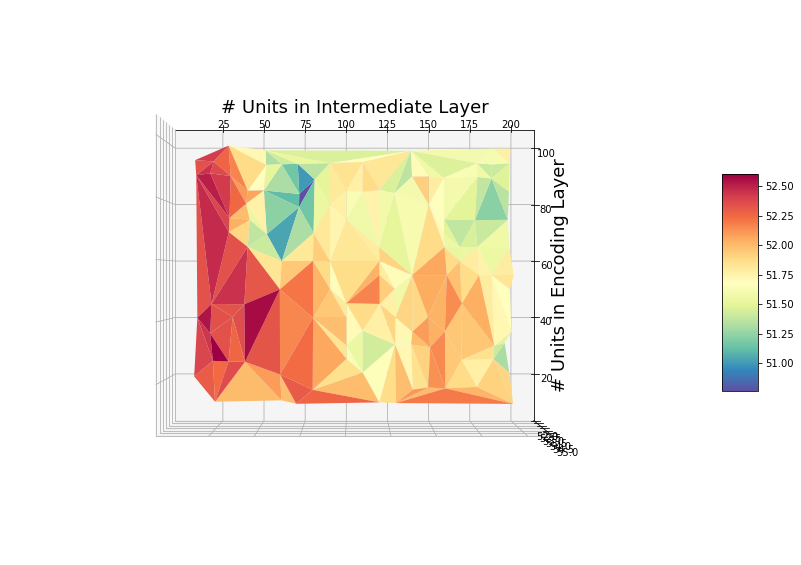

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

idx1=15
idx2=13
N=260
k=1
s=0
mask=((nparray[s:N:k,17]>0) & ((nparray[s:N:k,idx1]+nparray[s:N:k,idx2])/2 > 45))
#ax.scatter(nparray[0:200,18][mask], nparray[0:200,19][mask], (nparray[0:200,idx1][mask]+nparray[0:200,idx2][mask])/2)
surf = ax.plot_trisurf(nparray[s:N:k,18][mask], nparray[s:N:k,19][mask], (nparray[s:N:k,idx1][mask]+nparray[s:N:k,idx2][mask])/2, cmap=plt.cm.Spectral_r)

ax.set_xlabel('# Units in Intermediate Layer', fontsize=18)
ax.set_ylabel('# Units in Encoding Layer', fontsize=18)
#ax.set_zlabel('Accuracy', fontsize=18)
ax.set_zlim([52,55])
fig.colorbar(surf, shrink=0.4, aspect=6)

ax.view_init(elev=90, azim=-90)
plt.savefig('foo.png', bbox_inches='tight')
plt.show()


# Comparison
Print all models one in order to compare them and save the names of the best models

46


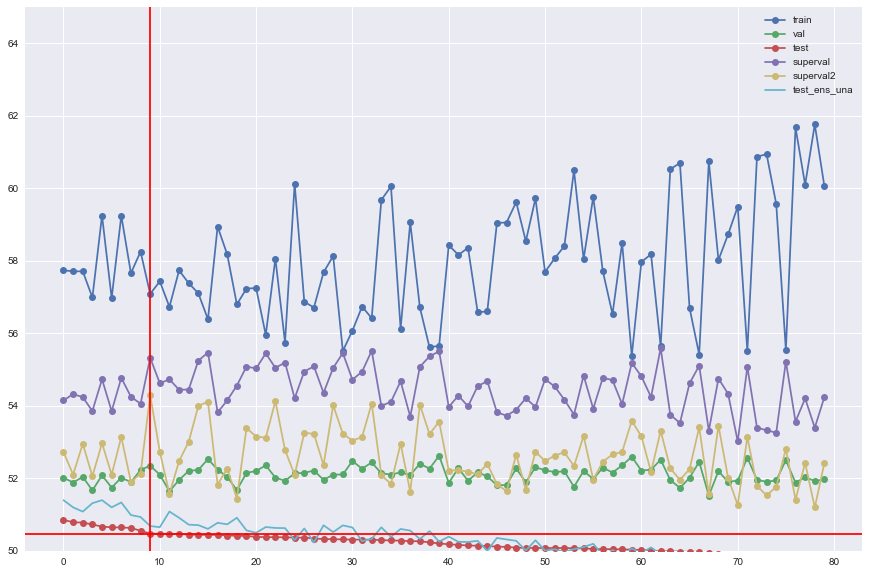

9 ['weightsCV_run43/test_2017-07-17_18:16:57_z_30_f1_0', 'weightsCV_run43/test_2017-07-17_18:16:57_z_30_f1_1', 'weightsCV_run43/test_2017-07-17_18:16:57_z_30_f1_2']
[[ 20.          57.74210825   0.         ...,  52.72415831   0.           0.        ]
 [ 23.          57.71024683   0.         ...,  52.10409801   0.           0.        ]
 [ 21.          57.7126802    0.         ...,  52.95154715   0.           0.        ]
 ..., 
 [ 35.          60.10036705   0.         ...,  52.42464614   0.           0.        ]
 [  1.          61.76502402   0.         ...,  51.19554438   0.           0.        ]
 [ 34.          60.05487443   0.         ...,  52.42765128   0.           0.        ]]
best test acc: 50.8547734517 
selected test acc: 50.4755642016 | 0.0 
selected ens test acc: 50.5274406116 | 0.0 
selected ens unanimity test acc: 50.6830358025 | 0.0
47


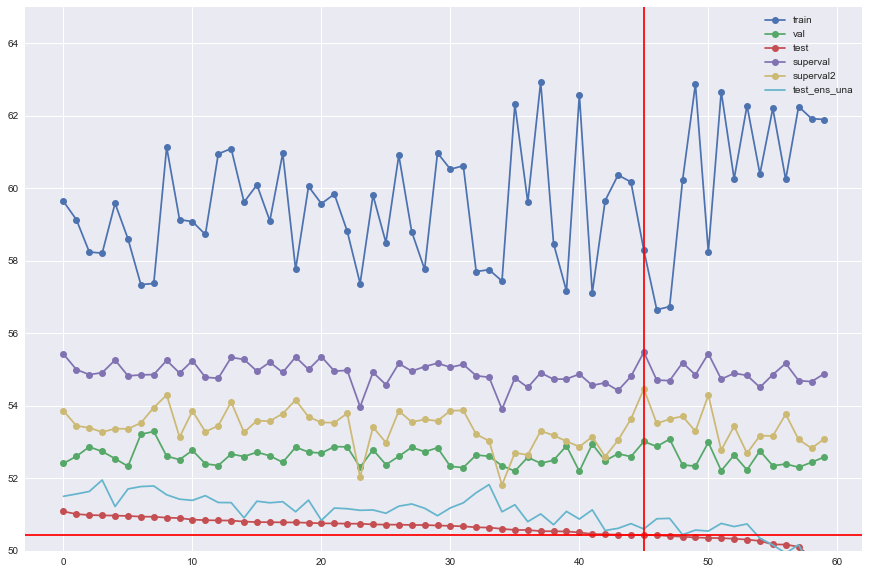

45 ['weightsCV_run44/test_2017-07-18_20:58:03_z_30_f1_0', 'weightsCV_run44/test_2017-07-18_20:58:03_z_30_f1_1', 'weightsCV_run44/test_2017-07-18_20:58:03_z_30_f1_2']
[[ 20.          59.64101909   0.         ...,  53.86121877   0.           0.        ]
 [ 25.          59.13782893   0.         ...,  53.44891564   0.           0.        ]
 [ 59.          58.2458675    0.         ...,  53.39325472   0.           0.        ]
 ..., 
 [ 37.          62.25971972   0.         ...,  53.07165828   0.           0.        ]
 [ 34.          61.92546655   0.         ...,  52.83046095   0.           0.        ]
 [ 35.          61.90026082   0.         ...,  53.08815041   0.           0.        ]]
best test acc: 51.0869220398 
selected test acc: 50.4322309461 | 0.0 
selected ens test acc: 50.697121104 | 0.0 
selected ens unanimity test acc: 50.6019292116 | 0.0
48


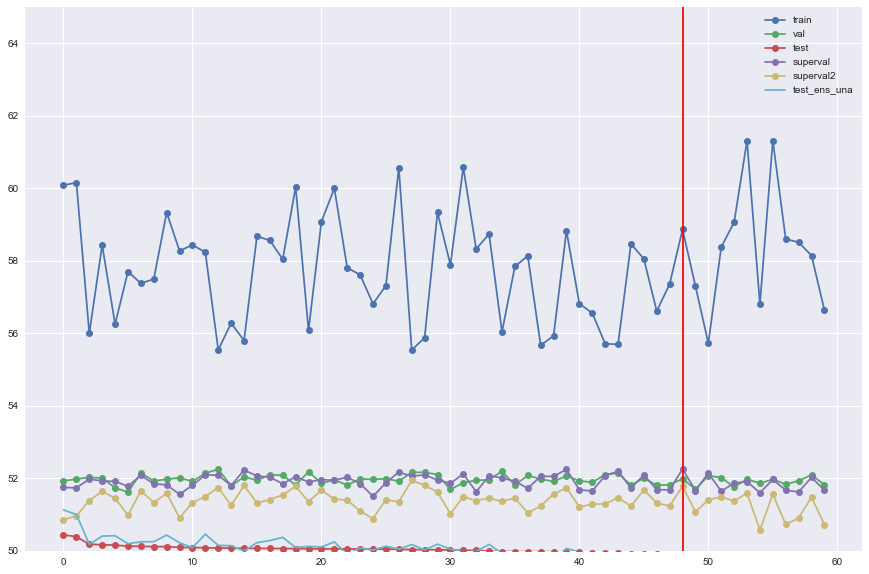

19 ['weightsCV_run45/test_2017-07-18_23:09:49_z_30_f1_0', 'weightsCV_run45/test_2017-07-18_23:09:49_z_30_f1_1', 'weightsCV_run45/test_2017-07-18_23:09:49_z_30_f1_2']
[[ 30.          60.08653982   0.         ...,  50.8633125    0.           0.        ]
 [ 31.          60.16202147   0.         ...,  50.95947895   0.           0.        ]
 [ 41.          55.99837172   0.         ...,  51.3878568    0.           0.        ]
 ..., 
 [ 28.          58.51492958   0.         ...,  50.90265332   0.           0.        ]
 [  5.          58.14813366   0.         ...,  51.48402325   0.           0.        ]
 [ 22.          56.6429615    0.         ...,  50.72343402   0.           0.        ]]
best test acc: 50.4411453131 
selected test acc: 49.8910378643 | 0.0 
selected ens test acc: 50.1679832925 | 0.0 
selected ens unanimity test acc: 49.9516950641 | 0.0
49


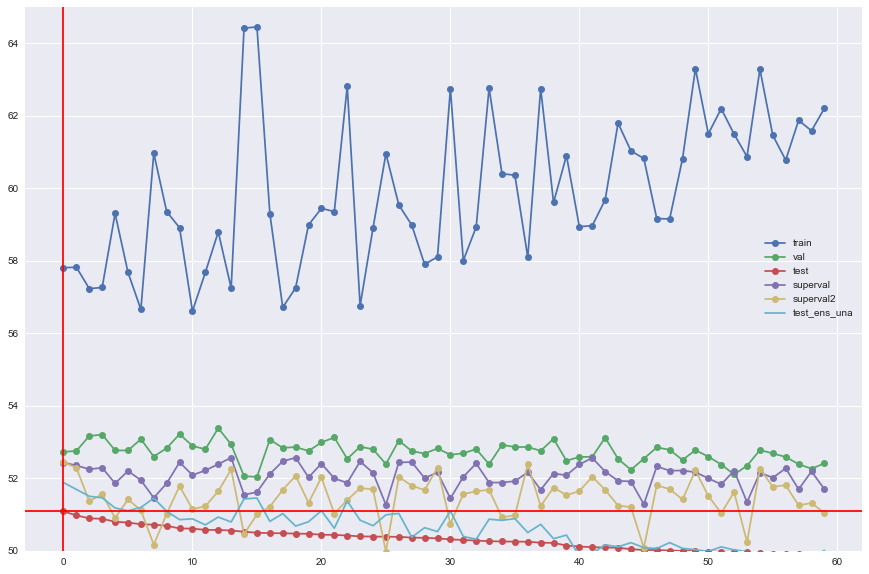

9 ['weightsCV_run46/test_2017-07-19_01:54:11_z_30_f1_0', 'weightsCV_run46/test_2017-07-19_01:54:11_z_30_f1_1', 'weightsCV_run46/test_2017-07-19_01:54:11_z_30_f1_2']
[[  9.          57.81244367   0.         ...,  52.44470314   0.           0.        ]
 [  8.          57.82369716   0.         ...,  52.2894839    0.           0.        ]
 [ 39.          57.23279546   0.         ...,  51.36463588   0.           0.        ]
 ..., 
 [ 36.          61.87884955   0.         ...,  51.25468891   0.           0.        ]
 [ 49.          61.58945233   0.         ...,  51.3193636    0.           0.        ]
 [ 35.          62.21136343   0.         ...,  51.04126245   0.           0.        ]]
best test acc: 51.0873671146 
selected test acc: 51.0873671146 | 0.0 
selected ens test acc: 51.0441962118 | 0.0 
selected ens unanimity test acc: 51.8818594495 | 0.0
50


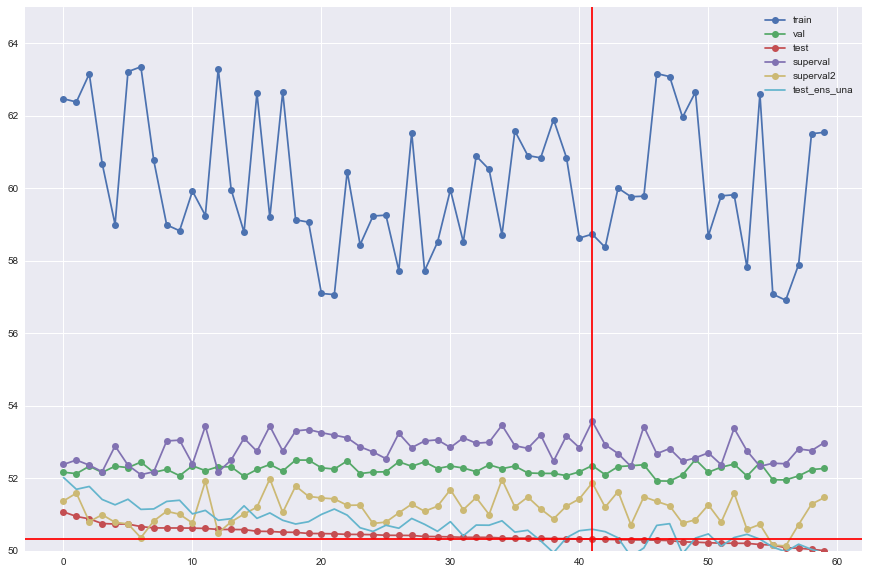

49 ['weightsCV_run47/test_2017-07-19_05:57:30_z_30_f1_0', 'weightsCV_run47/test_2017-07-19_05:57:30_z_30_f1_1', 'weightsCV_run47/test_2017-07-19_05:57:30_z_30_f1_2']
[[ 51.          62.4723262    0.         ...,  51.3756815    0.           0.        ]
 [ 50.          62.3846288    0.         ...,  51.59122607   0.           0.        ]
 [ 56.          63.1620348    0.         ...,  50.80512235   0.           0.        ]
 ..., 
 [ 23.          57.89669711   0.         ...,  50.72270825   0.           0.        ]
 [ 55.          61.50892717   0.         ...,  51.28692786   0.           0.        ]
 [ 54.          61.547339     0.         ...,  51.47077469   0.           0.        ]]
best test acc: 51.0743074478 
selected test acc: 50.3278269755 | 0.0 
selected ens test acc: 51.0132833787 | 0.0 
selected ens unanimity test acc: 50.5939567886 | 0.0
51


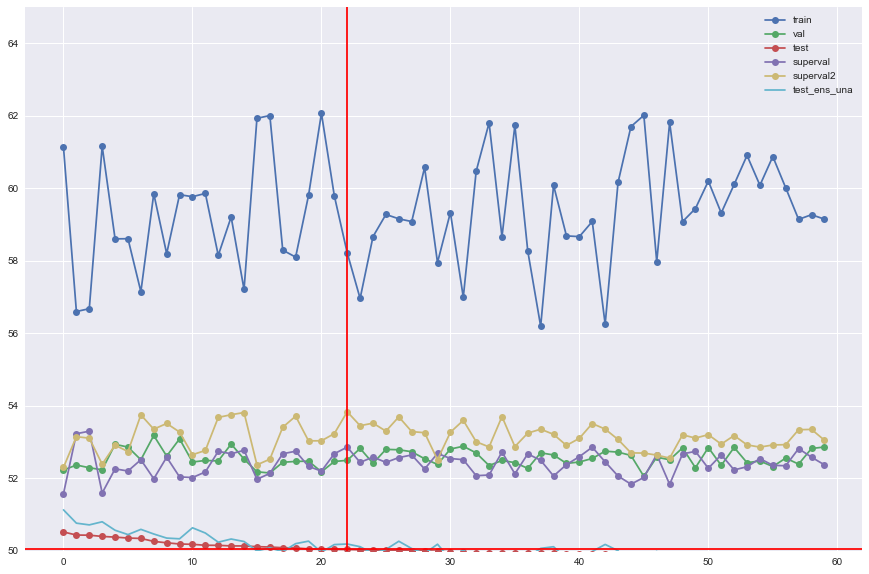

59 ['weightsCV_run48/test_2017-07-19_10:27:15_z_30_f1_0', 'weightsCV_run48/test_2017-07-19_10:27:15_z_30_f1_1', 'weightsCV_run48/test_2017-07-19_10:27:15_z_30_f1_2']
[[ 48.          61.13304998   0.         ...,  52.30315843   0.           0.        ]
 [ 38.          56.60253079   0.         ...,  53.1488244    0.           0.        ]
 [ 39.          56.68089714   0.         ...,  53.10824951   0.           0.        ]
 ..., 
 [  3.          59.14498121   0.         ...,  53.34102121   0.           0.        ]
 [ 19.          59.27397181   0.         ...,  53.34956329   0.           0.        ]
 [ 18.          59.15192872   0.         ...,  53.05272599   0.           0.        ]]
best test acc: 50.5200041188 
selected test acc: 50.0360398894 | 0.0 
selected ens test acc: 50.2483187986 | 0.0 
selected ens unanimity test acc: 50.1872006966 | 0.0
52


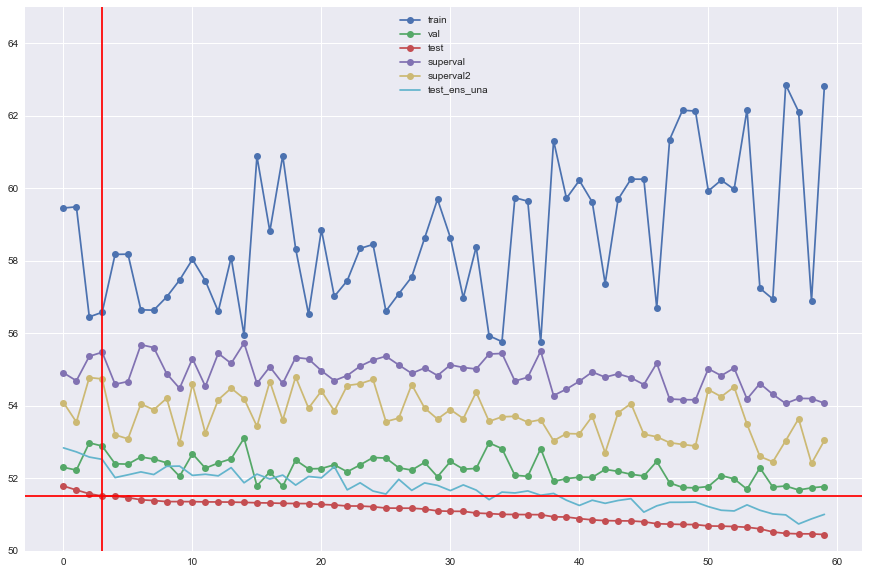

38 ['weightsCV_run49/test_2017-07-19_12:34:05_z_30_f0_0', 'weightsCV_run49/test_2017-07-19_12:34:05_z_30_f0_1', 'weightsCV_run49/test_2017-07-19_12:34:05_z_30_f0_2']
[[ 56.          59.45823227   0.         ...,  54.08954698   0.           0.        ]
 [ 57.          59.49171678   0.         ...,  53.55191257   0.           0.        ]
 [ 39.          56.45386931   0.         ...,  54.78142077   0.           0.        ]
 ..., 
 [ 30.          62.11747173   0.         ...,  53.6444562    0.           0.        ]
 [ 50.          56.89467044   0.         ...,  52.41054116   0.           0.        ]
 [  0.          62.83355235   0.         ...,  53.04512604   0.           0.        ]]
best test acc: 51.7878938209 
selected test acc: 51.5115006339 | 0.0 
selected ens test acc: 51.8508894191 | 0.0 
selected ens unanimity test acc: 52.5235739682 | 0.0
53


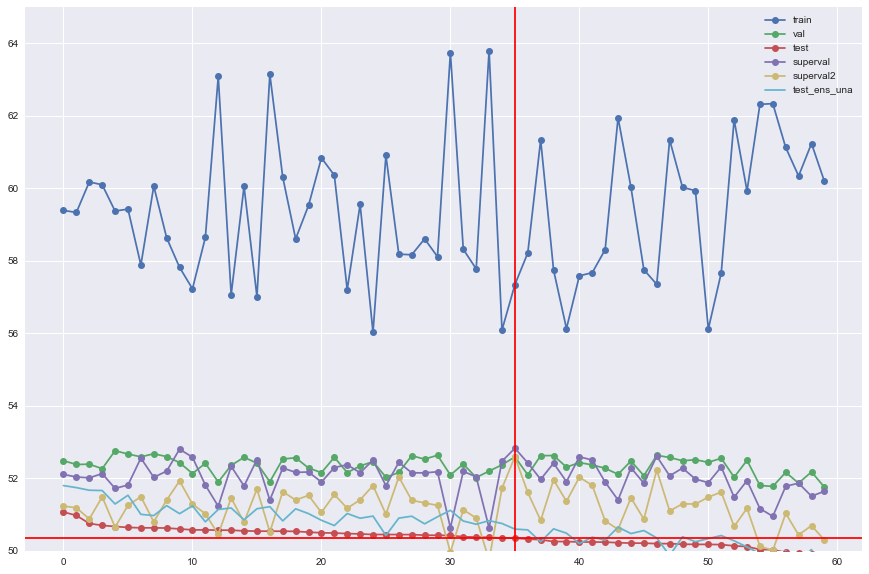

9 ['weightsCV_run50/test_2017-07-19_14:11:31_z_30_f1_0', 'weightsCV_run50/test_2017-07-19_14:11:31_z_30_f1_1', 'weightsCV_run50/test_2017-07-19_14:11:31_z_30_f1_2']
[[ 50.          59.39255087   0.         ...,  51.23490838   0.           0.        ]
 [ 51.          59.33684887   0.         ...,  51.18587976   0.           0.        ]
 [ 13.          60.17846991   0.         ...,  50.87945088   0.           0.        ]
 ..., 
 [ 41.          60.34252651   0.         ...,  50.4381933    0.           0.        ]
 [ 35.          61.23886259   0.         ...,  50.69559355   0.           0.        ]
 [ 40.          60.19412279   0.         ...,  50.29723601   0.           0.        ]]
best test acc: 51.0705075446 
selected test acc: 50.3473251029 | 0.0 
selected ens test acc: 50.495473251 | 0.0 
selected ens unanimity test acc: 50.5984042553 | 0.0
54


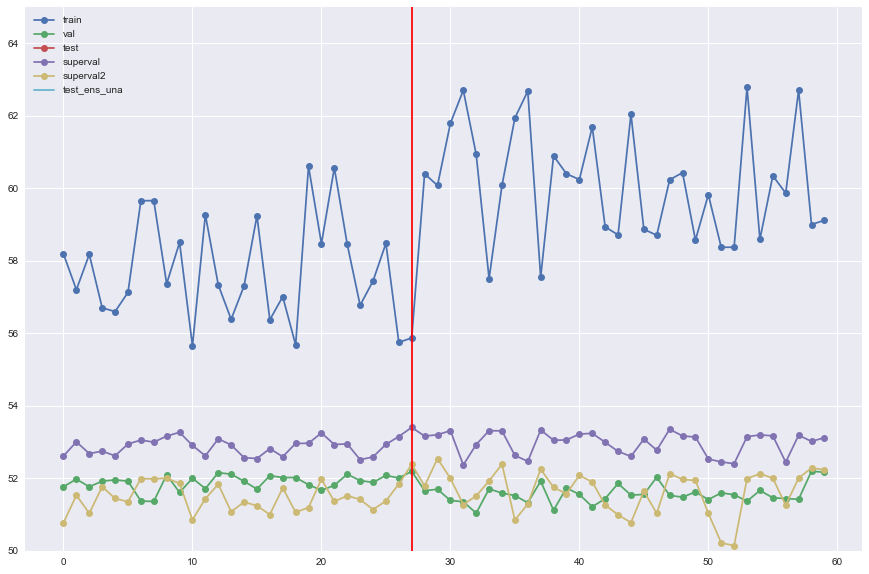

47 ['weightsCV_run51/test_2017-07-19_18:30:06_z_30_f1_0', 'weightsCV_run51/test_2017-07-19_18:30:06_z_30_f1_1', 'weightsCV_run51/test_2017-07-19_18:30:06_z_30_f1_2']
[[ 20.          58.19022418   0.         ...,  50.77200028   0.           0.        ]
 [  9.          57.20454366   0.         ...,  51.5336149    0.           0.        ]
 [ 21.          58.17860623   0.         ...,  51.03510351   0.           0.        ]
 ..., 
 [  0.          62.70813475   0.         ...,  52.00443121   0.           0.        ]
 [ 25.          59.00202905   0.         ...,  52.28830575   0.           0.        ]
 [ 24.          59.12137671   0.         ...,  52.2329156    0.           0.        ]]
best test acc: 49.8705084658 
selected test acc: 49.3121982327 | 0.0 
selected ens test acc: 49.3148010776 | 0.0 
selected ens unanimity test acc: 48.8885931053 | 0.0


In [236]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wDs = ["weightsCV_run43","weightsCV_run44","weightsCV_run45","weightsCV_run46","weightsCV_run47","weightsCV_run48",
       "weightsCV_run49","weightsCV_run50","weightsCV_run51"]
Ids = [46, 47, 48, 49, 50, 51, 52, 53, 54]
best = []
for i,Id in enumerate(Ids):
    wD = wDs[i]
    filenames = []
    unique = []

    for file in glob.glob("%s/test_*.hdf5"%(wD)):
        name = file[len(wD)+6:-7]
        if name not in unique:
            unique.append(name)
    for u in unique:
        filenames.append([f[:-5] for f in glob.glob("%s/test_*.hdf5"%(wD)) if u in f])    
    
    print(Id)
    with open("_pickles/results_z30_%s.p"%Id,'rb') as f:
        results = pickle.load(f)
    with open("_pickles/results_ens_z30_%s.p"%Id,'rb') as f:
        r = pickle.load(f)
    #filename = glob.glob("%s/CVhyperasSearchParameters_*.p"%wD)[0]
    #with open(filename,'rb') as f:
    #    params, _, _ = pickle.load(f)
        
    nparray = np.zeros((len(results),18))
    for i,res in enumerate(results):
        nparray[i,:]= i,res[0][0],res[0][1],res[1][0],res[1][1],res[2][0],res[2][1],r[i][0][0],r[i][0][1],r[i][1][0],r[i][1][1],r[i][2][0],r[i][2][1],res[3][0],res[3][1],r[i][3][0],r[i][3][1],0#params[int(i/2)]["d"]

    # order by: 
    #   3 for val
    #   5 for test
    #   7 for ens test
    #   9 for ens test unanimity
    #   13 for superval
    #   17 for dropout
    idx = 5
    nparray = nparray[nparray[:,idx].argsort()[::-1]]
    #nparray = nparray[nparray[:,1]<60]
    #nparray = nparray[(nparray[:,13]+nparray[:,15]).argsort()[::-1]]

    argmidx1=15
    argmidx2=13
    argm = np.argmax(nparray[0:200,argmidx1]+nparray[0:200,argmidx2])
    plt.figure(figsize=(15,10))

    #'''
    plt.plot(nparray[0:200,1],'-o', label='train')
    plt.plot(nparray[0:200,3],'-o',label='val')
    plt.plot(nparray[0:200,5],'-o',label='test')
    plt.plot(nparray[0:200,13],'-o',label='superval')
    plt.plot(nparray[0:200,15],'-o',label='superval2')
    #plt.plot(nparray[0:200,7],label='test_ens_soft')
    plt.plot(nparray[0:200,9],label='test_ens_una')
    #plt.plot(nparray[0:200,11],label='test_ens_hard')
    plt.axvline(x=argm,color='r')

    '''
    plt.plot(nparray[0:200,idx],nparray[0:200,1],'o', label='train')
    plt.plot(nparray[0:200,idx],nparray[0:200,3],'o',label='val')
    plt.plot(nparray[0:200,idx],nparray[0:200,5],'o',label='test')
    plt.plot(nparray[0:200,idx],nparray[0:200,15],'o',label='superval2')
    #plt.plot(nparray[0:200,idx],nparray[0:200,7],'o',label='test_ens_soft')
    #plt.plot(nparray[0:200,idx],nparray[0:200,9],'o',label='test_ens_una')
    #plt.plot(nparray[0:200,idx],nparray[0:200,11],'o',label='test_ens_hard')
    #plt.plot(nparray[0:200,idx],nparray[0:200,13],'o',label='superval')
    plt.axvline(x=nparray[argm,idx],color='r')
    #'''

    plt.axhline(y=nparray[argm,5],color='r')
    plt.axhline(y=nparray[argm,argmidx1]+nparray[argm,argmidx2],color='y')

    axes = plt.gca()
    axes.set_ylim([50,65])

    plt.legend()
    plt.show()
    print(int(nparray[argm,0]), filenames[int(nparray[argm,0])])
    best.append(filenames[int(nparray[argm,0])])
    print(nparray)
    print("best test acc: %s \nselected test acc: %s | %s \nselected ens test acc: %s | %s \nselected ens unanimity test acc: %s | %s"%(nparray[0,5],nparray[argm,5],nparray[argm,6],nparray[argm,7],nparray[argm,8],nparray[argm,9],nparray[argm,10]))


In [53]:
print(best)

[['weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_0', 'weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_1', 'weightsCV_run12/test_2017-06-29_18:40:40_z_30_f0_2'], ['weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_0', 'weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_1', 'weightsCV_run13/test_2017-06-30_01:42:57_z_50_f1_2'], ['weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_0', 'weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_1', 'weightsCV_run14/test_2017-06-30_08:26:37_z_70_f1_2'], ['weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_0', 'weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_1', 'weightsCV_run15/test_2017-06-30_19:42:27_a_z_30_f0_2'], ['weightsCV_run16/test_2017-06-30_23:30:11_a_z_50_f0_0', 'weightsCV_run16/test_2017-06-30_23:30:11_a_z_50_f0_1', 'weightsCV_run16/test_2017-06-30_23:30:11_a_z_50_f0_2'], ['weightsCV_run17/test_2017-07-01_07:46:43_a_z_70_f0_0', 'weightsCV_run17/test_2017-07-01_07:46:43_a_z_70_f0_1', 'weightsCV_run17/test_2017-07-01_07:46:43_a_z_70_f0_2'